<a href="https://colab.research.google.com/github/Mashaell22/repot5/blob/main/Exponential_smoothing_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exponential smoothing**



##  install these libraries using pip:



In [1]:
!pip install pandas matplotlib

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

## Loading dataset

In [4]:
data = pd.read_csv('/content/traffic.csv' , parse_dates=['DateTime'])
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## Visualizing the data





In [5]:
data.drop(columns = ['ID'], axis =1, inplace = True)

In [6]:
import datetime as dt

In [7]:
new_df = data[data['Junction'] == 1]

# Convert the time data to just the date
new_df['Date'] = new_df['DateTime'].dt.date

# Filter the data for the morning period (from 6 AM to 12 PM) and aggregate based on the date
morning = new_df[(new_df['DateTime'].dt.hour >= 6) & (new_df['DateTime'].dt.hour < 12)].groupby('Date')['Vehicles'].sum()

<ipython-input-7-0238d92ca3b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Date'] = new_df['DateTime'].dt.date


In [8]:
morning.info()

<class 'pandas.core.series.Series'>
Index: 608 entries, 2015-11-01 to 2017-06-30
Series name: Vehicles
Non-Null Count  Dtype
--------------  -----
608 non-null    int64
dtypes: int64(1)
memory usage: 9.5+ KB


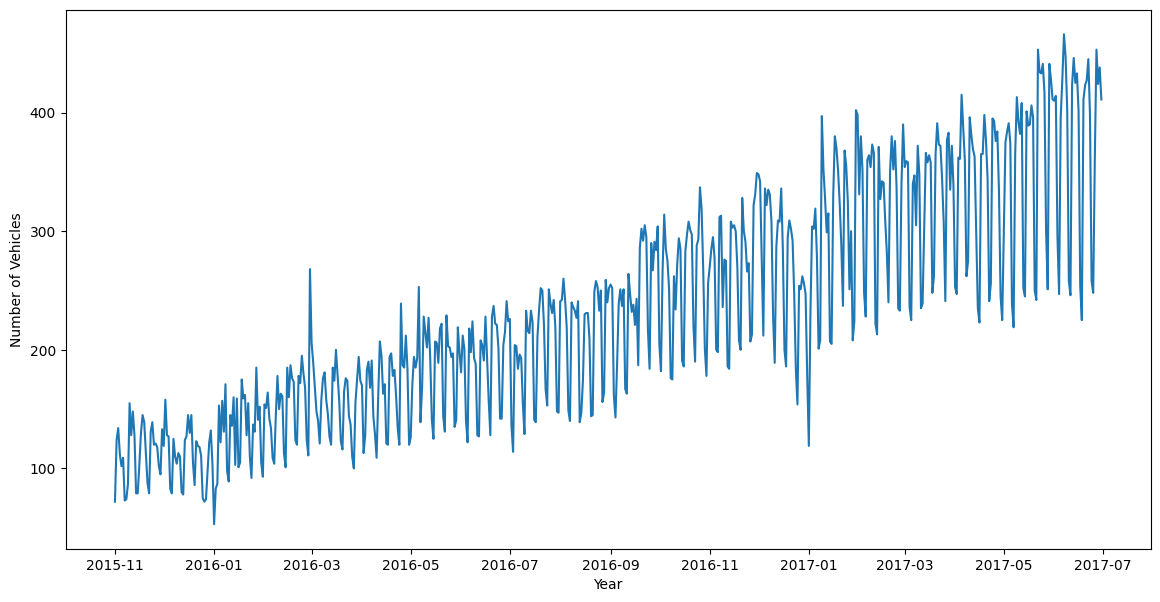

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(morning)
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.show()

#**Single Exponential smoothing**





In [10]:
from statsmodels.tsa.api import SimpleExpSmoothing
model = SimpleExpSmoothing(morning)
model_single_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Making predictions





In [11]:
forecast_single = model_single_fit.forecast(240)

## Visualize Single Exponential Smoothing




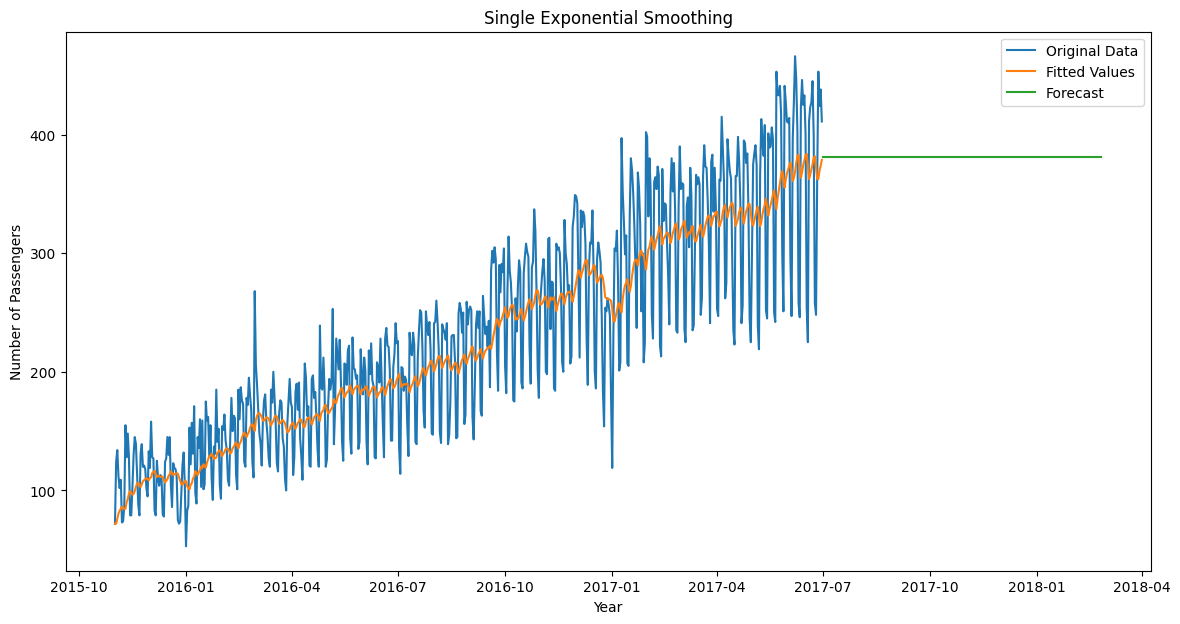

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(morning, label='Original Data')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_single, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.show()

#**Double Exponential Smoothing**




In [13]:
from statsmodels.tsa.api import Holt

model_double = Holt(morning)
model_double_fit = model_double.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Making predictions



In [14]:
forecast_double = model_double_fit.forecast(100)

## Visualize Double Exponential Smoothing




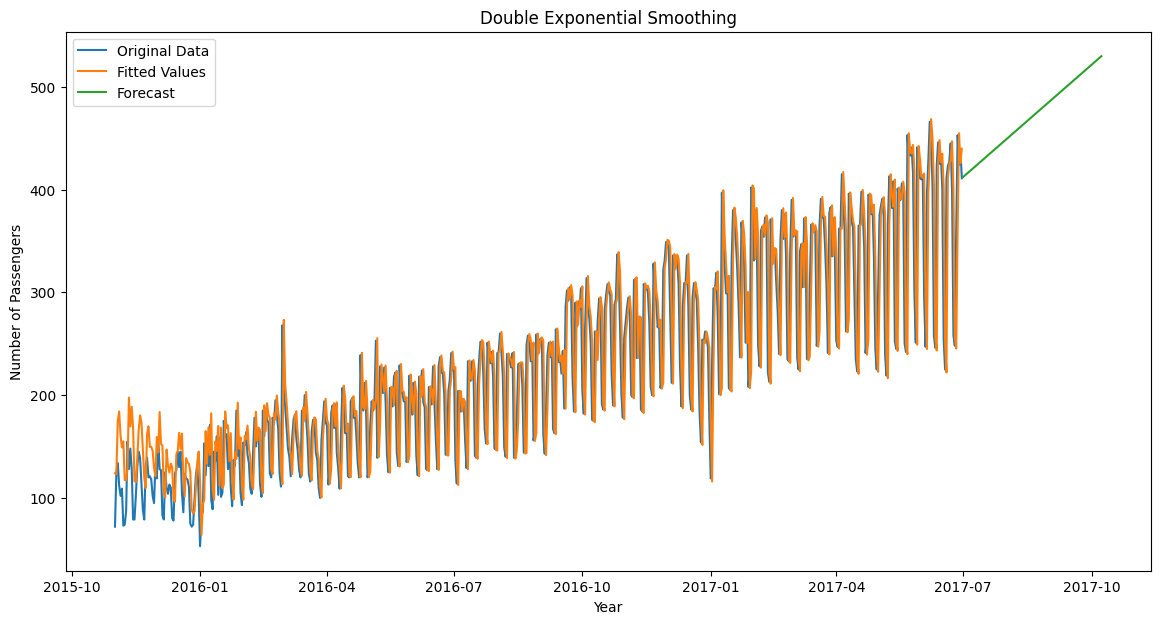

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(morning, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_double, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()

#**Holt-Winter’s Seasonal Smoothing**






In [16]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    morning, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Making predictions



In [17]:
forecast_triple = model_triple_fit.forecast(300)

## Visualize Triple Exponential Smoothing




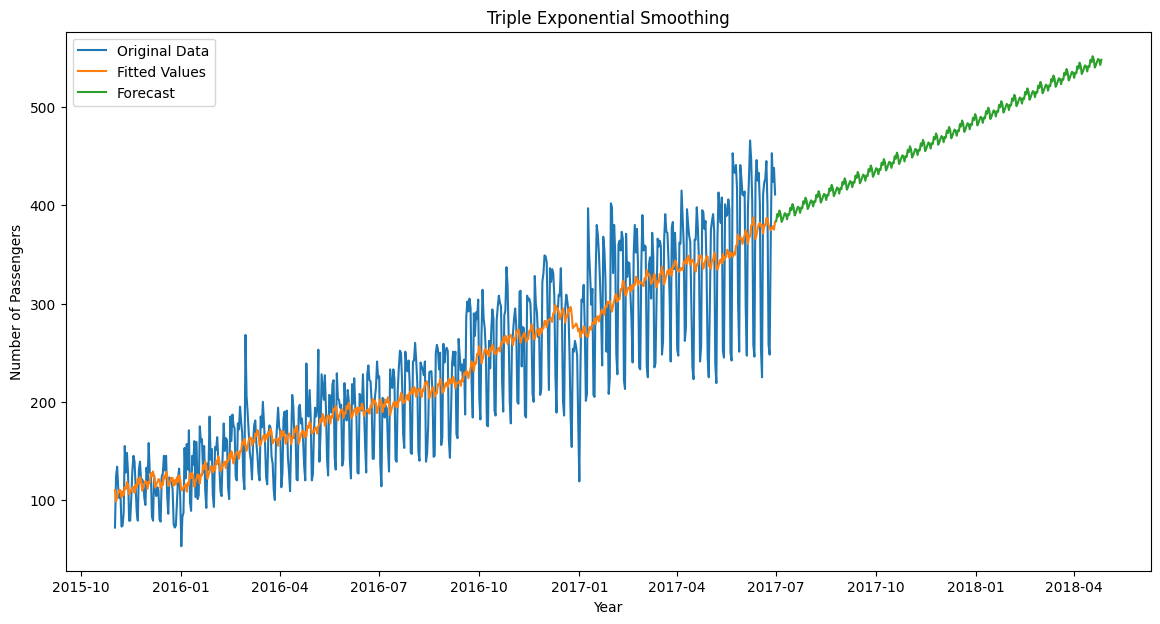

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(morning, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()


##**Well done :)**